In [1]:
from packages import *
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import json
%load_ext autoreload
%autoreload 2

In [2]:
requested_files = ['business']

In [3]:
filenames = {i: '{}.json'.format(i) for i in requested_files}

In [4]:
data = {}
for key, value in filenames.items():
    data[key] = []
    path = os.path.join(DATA_DIR, 'yelp', value)
    with open(path, 'rb') as f:
        for line in f:
            data[key].append(json.loads(line))
    data[key] = pd.DataFrame(data[key])

In [5]:
columns = { 'business': ['text']}

In [6]:
data['business'].columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

In [7]:
# review data
dtypes = {
    'address' : str, 
    'attributes' : str, 
    'business_id' : str, 
    'categories' : str, 
    'city' : str, 
    'hours': str,
    'is_open' : bool, 
    'latitude' : np.int32 , 
    'longitude' : np.int32, 
    'name' : str, 
    'postal_code' : str,
    'review_count' : np.int32, 
    'stars' : np.float32, 
    'state': str,
}

In [8]:
# review data
# dtypes = {
#     'business_id': str,
#     'text': str,
#     'date': np.datetime64,
#     'cool': np.int16,
#     'funny': np.int16,
#     'useful': np.int16,
#     'stars': np.int16,
#     'review_id': str,
#     'user_id':str
# }

In [9]:
# user data
# dtypes = {
#     'average_stars': np.float16,
#     'compliment_cool': np.int16,
#     'compliment_cute': np.int16,
#     'compliment_funny': np.int16,
#     'compliment_hot': np.int16,
#     'compliment_list': np.int16,
#     'compliment_more': np.int16,
#     'compliment_note': np.int16,
#     'compliment_photos': np.int16,
#     'compliment_plain': np.int16,
#     'compliment_profile': np.int16,
#     'compliment_writer': np.int16,
#     'cool': np.int16,
#     'elite': str,
#     'fans': np.int16,
#     'friends': str,
#     'funny': np.int16,
#     'name':str,
#     'review_count': np.int16,
#     'useful': np.int16,
#     'user_id': str,
#     'yelping_since': str,
# }

In [10]:
for key in data:
    for c in data[key].columns:
#         if c == 'friends':
#             continue
        path = os.path.join(DATA_DIR, 'dataset', '{}-{}.npy'.format(key, c))
        if c == 'text':
            np.save(path, np.asarray(data[key][c]), allow_pickle=True)
        else:
            np.save(path, np.asarray(data[key][c], dtype=dtypes[c]), allow_pickle=False)

In [11]:
def load_data(lookup):
    data  = {}
    for key in lookup:
        data[key] = {}
        for c in lookup[key]:
            path = os.path.join(DATA_DIR, 'dataset', '{}-{}.npy'.format(key, c))
            if c == 'text':
                x = np.load(path, allow_pickle=True)
            else:
                x = np.load(path, allow_pickle=False)
            data[key][c] = x
    return data

In [12]:
review_data = load_data({'review': ['stars', 'date', 'user_id']})['review']

In [13]:
user_data = load_data({'user': ['user_id','elite', 'review_count']})['user']

In [14]:
unique, counts = np.unique(review_data['stars'], return_counts=True)
star_count = dict(zip(unique, counts))

In [15]:
star_count

{1: 1002159, 2: 542394, 3: 739280, 4: 1468985, 5: 2933082}

In [16]:
save_pickle(os.path.join(MISC_DIR, 'star_counts.pkl'), star_count)

In [48]:
elite_count = np.count_nonzero(np.where(user_data['elite']))

In [54]:
user_data

{'user_id': array(['l6BmjZMeQD3rDxWUbiAiow', '4XChL029mKr5hydo79Ljxg',
        'bc8C_eETBWL0olvFSJJd0w', ..., 'ib_elCBhGOamS0AALkh4Og',
        'WV27LoSFDG_YmiDKTLKKLA', 'agVqH9xDhNw8n7ve66H1Uw'], dtype='<U22'),
 'elite': array(['2015,2016,2017', '', '', ..., '', '', ''], dtype='<U64'),
 'review_count': array([95, 33, 16, ...,  4,  1,  1], dtype=int16)}

In [55]:
user_id_elite_lookup = {}
for i, user_id in enumerate(user_data['user_id']):
    user_id_elite_lookup[user_id] = not(user_data['elite'][i] == '')

In [59]:
elite_review_count = 0
for i, user_id in enumerate(review_data['user_id']):
    elite_review_count += int(user_id_elite_lookup.get(user_id, 0))

In [60]:
elite_review_count

1581841

In [94]:
dist, bins = np.histogram(user_data['review_count'], bins = 100000)
review_count_dist = (dist, bins)

In [95]:
dataset_stats = {'5_stars' : star_count[5], 
                 '4_stars' : star_count[4], 
                 '3_stars' : star_count[3], 
                 '2_stars' : star_count[2],
                 '1_stars' : star_count[1], 
                 'elites' : elite_count,
                 'elite_reviews' : elite_review_count,
                 'review_dist' : review_count_dist,
                 }

In [78]:
plt.style.use('fast')

([<matplotlib.patches.Wedge at 0x7fb6ef939d68>,
 [Text(0.21054197190340443, 1.079662946510172, '(5) ★★★★★'),
  Text(-1.049208117937588, -0.33039722343546474, '(4) ★★★★'),
  Text(-0.24873801929002542, -1.0715080017245204, '(3) ★★★'),
  Text(0.40201823419924604, -1.0239049464531953, '(2) ★★'),
  Text(0.9802774431717307, -0.49905524184071487, '(1) ★')])

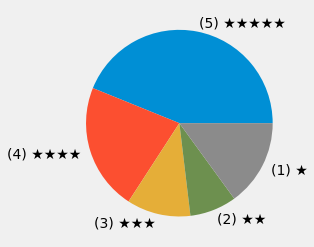

In [79]:
stars_prop = [dataset_stats['5_stars'], dataset_stats['4_stars'], dataset_stats['3_stars'], dataset_stats['2_stars'], dataset_stats['1_stars']]
stars_labels = ['(5) ★★★★★', '(4) ★★★★', '(3) ★★★', '(2) ★★', '(1) ★']
plt.pie(stars_prop, labels = stars_labels)

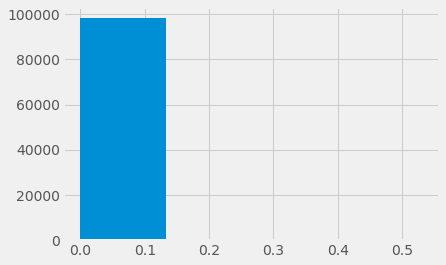

In [98]:
# stars_prop = [dataset_stats['5_stars'], dataset_stats['4_stars'], dataset_stats['3_stars'], dataset_stats['2_stars'], dataset_stats['1_stars']]
# stars_labels = ['(5) ★★★★★', '(4) ★★★★', '(3) ★★★', '(2) ★★', '(1) ★']
_ = plt.hist(review_count_dist[0], bins = review_count_dist[1][:5])